In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_theme()

In [2]:
wines = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\wine.csv')

In [3]:
wines

,type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wines_sub = wines.loc[wines['type']!=3, ['type', 'Alcohol', 'Color intensity']]

In [6]:
#from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples = 100, centers = 4, n_features = 2, random_state = 0)

In [5]:
X = wines_sub[['Alcohol', 'Color intensity']].values
y = wines_sub['type'].values

In [6]:
def colors(y):
    if y == 1:
        return("red")   ## Here type 1 wine is labeled as red dots, and type 2 wine is painted as lightseagreen
    else:
        return('lightseagreen')

c = [colors(label) for label in y]

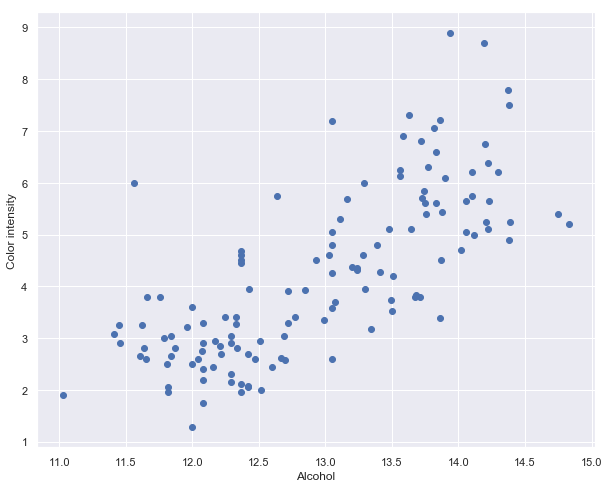

In [7]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.show()

In [8]:
# start by randomly choosing a center

centers = []
for k in range(2):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

In [9]:
centers

[(12.7, 2.57, 0), (14.37, 7.8, 1)]

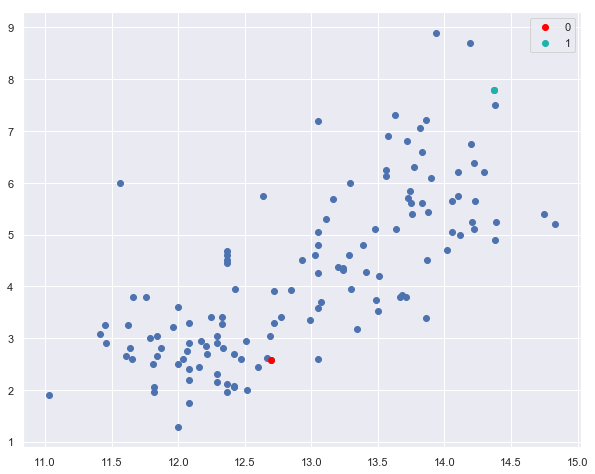

In [10]:
# plot the random center of two types of wines. The red represents type 1 and green represents type 2.

plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.legend()
plt.show()

In [18]:
# the function that calculates the distance of one data point to the center. i controls the ith sample, and j is the dimension of data(here is 2).

def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [19]:
# calculate the distance of one data point to two centers every time, then return the index of the smaller distance.
# If it is closed to center 1, it will get a label of 1(0), otherwise it will be labelled as 2(1).

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [21]:
# return a label of all data points.

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

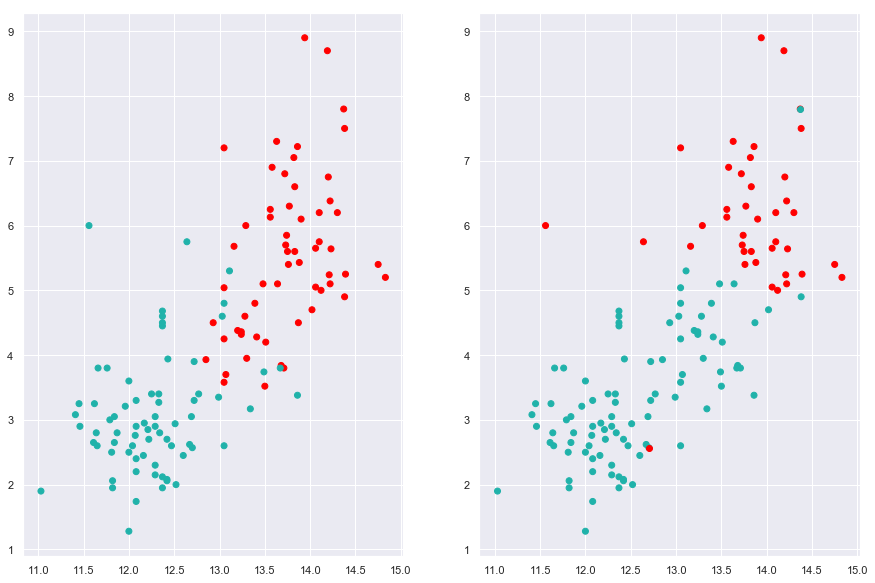

In [22]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

# compare the original color distribution to the new distribution based on a group of randomly chosen centers.
ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])

plt.show()

##### So the first clustering is not good.

In [37]:
# calculate the total distance to x-axis and y-axis of all points that have the same label, then average it by the number of points in such a label.

def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

In [38]:
new_centers = update_centers(X, centers)

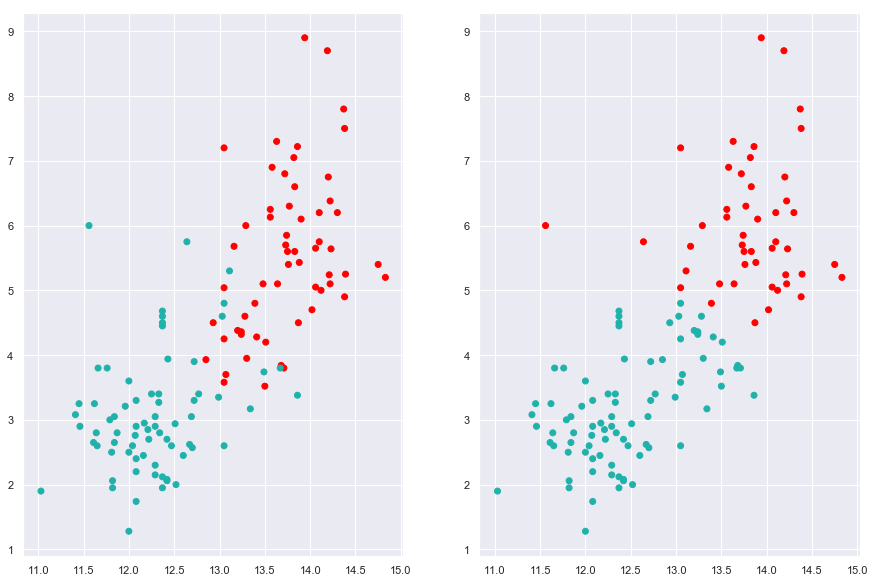

In [40]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

##### By updating the distances, we see the performance of clustering is improved, and more red points are correctly classified. 

In [41]:
# Then we will try k-means clustering.

def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

In [42]:
centers = k_means_clustering(X, 2)

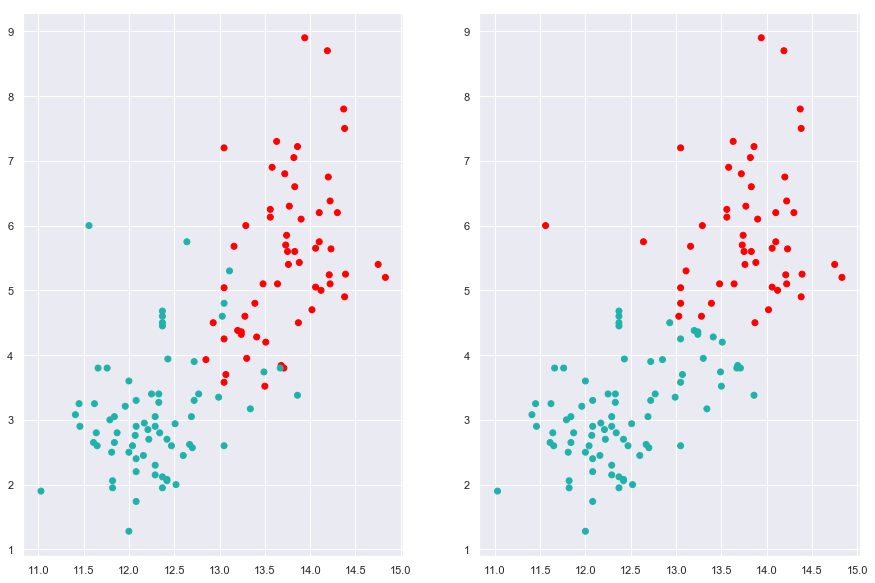

In [43]:
centers = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

#### The clustering seems to not improve after 100 iterations. Here it can be explained that there are a group of red points mixing with the green points, which makes it more difficult to correctly cluster these points. In the next step, we are going to see if K-means in sklearn would have better performance.

In [44]:
from sklearn.cluster import KMeans

Xp = wines_sub[['Alcohol', 'Color intensity']]
yp = wines_sub['type']

In [47]:
km0 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, tol=1e-04, random_state=0)

yp_km = km0.fit_predict(Xp)

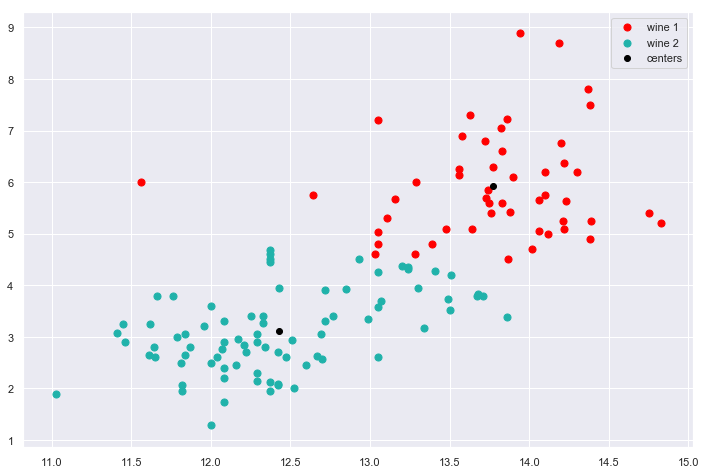

In [51]:
# plot the 3 clusters
plt.figure(figsize = [12, 8])
plt.scatter(X[yp_km == 0, 0], X[yp_km == 0, 1], s=50, c='red', label='wine 1')
plt.scatter(X[yp_km == 1, 0], X[yp_km == 1, 1], s=50, c='lightseagreen', label='wine 2')
plt.scatter(km0.cluster_centers_[:, 0], km0.cluster_centers_[:, 1], c='black', label='centers')
plt.legend(scatterpoints=1)
plt.show()

##### Even with the help of K-means function, we discovered that the group of mix points cannot be clustered correctly.